In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import warnings

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings(action='ignore') 

from src import crs, PublicPredictor
from src.dbc import utils, TimeDivisionKMeans

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
p, m = crs.utils.data_preprocessing(xlsx)

m.set_index("month", inplace=True)

# 3. data init
_month = 1

month_df = pd.DataFrame(m.loc[_month])
month_df.reset_index(inplace=True)

month_df.columns = ['name', 'usage (kWh)']

PUBLIC_PERCENTAGE = 30
APT = crs.utils.get_APT(month_df, PUBLIC_PERCENTAGE)

calc = crs.models.ManagementOffice(
        month=_month,
        households=month_df,
        APT=APT,
        contract="단일계약"
    )
apt = calc.apart

In [4]:
m_15 = utils.data_preprocessing(xlsx)

df = utils.dimension_reduction(m_15)
m_60 = df.copy()

m_60.head()

m_60_1 = m_60[m_60.index.month == 1].copy()
m_60_1.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-01 00:00:00,0.033,0.000,0.034,0.037,0.062,0.322,0.240,0.295,0.373,0.243,...,0.534,0.188,0.400,0.318,0.420,0.626,0.484,0.289,0.305,0.652
2019-01-01 01:00:00,0.048,0.000,0.033,0.037,0.063,0.185,0.257,0.397,0.257,0.228,...,0.396,0.434,0.355,0.250,0.465,0.409,0.459,0.336,0.332,0.557
2019-01-01 02:00:00,0.032,0.000,0.039,0.036,0.062,0.175,0.384,0.353,0.123,0.141,...,0.194,0.337,0.379,0.274,0.326,0.307,0.405,0.382,0.311,0.491
2019-01-01 03:00:00,0.033,0.000,0.039,0.037,0.062,0.167,0.276,0.488,0.142,0.159,...,0.286,0.263,0.375,0.264,0.336,0.345,0.298,0.291,0.261,0.511
2019-01-01 04:00:00,0.032,0.001,0.033,0.037,0.063,0.197,0.266,0.278,0.190,0.227,...,0.275,0.245,0.310,0.423,0.360,0.364,0.212,0.347,0.294,0.507


In [5]:
m_60_1.tail()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2019-01-31 19:00:00,0.082,0.029,0.027,0.252,0.045,0.295,0.513,1.029,0.010,0.517,...,0.243,0.286,0.791,0.321,0.835,0.492,0.603,0.397,0.307,0.434
2019-01-31 20:00:00,0.070,0.029,0.027,0.338,0.044,0.318,0.556,0.239,0.010,0.444,...,0.325,0.328,0.809,0.458,0.749,0.444,0.339,0.285,0.255,0.451
2019-01-31 21:00:00,0.105,0.029,0.025,0.254,0.044,0.374,0.267,0.204,0.029,0.382,...,0.314,0.625,0.404,0.338,0.519,0.345,0.243,0.270,0.367,0.420
2019-01-31 22:00:00,0.064,0.030,0.028,0.276,0.045,0.304,0.217,0.278,0.010,0.221,...,0.280,0.393,0.363,0.367,0.804,0.577,0.262,0.359,0.351,0.596
2019-01-31 23:00:00,0.070,0.028,0.027,0.206,0.044,0.218,0.160,0.471,0.010,0.209,...,0.242,0.209,0.398,0.333,0.677,0.482,0.220,0.335,0.362,0.535


In [8]:
from src import TimeDivisionKMeans

tdKMeans = TimeDivisionKMeans(datas=m_60_1)
tdKMeans.fit()

1/248 - ECV:85%
11/248 - ECV:78%
21/248 - ECV:86%
31/248 - ECV:86%
41/248 - ECV:88%
51/248 - ECV:83%
61/248 - ECV:88%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:84%
101/248 - ECV:86%
111/248 - ECV:82%
121/248 - ECV:89%
131/248 - ECV:80%
141/248 - ECV:85%
151/248 - ECV:87%
161/248 - ECV:88%
171/248 - ECV:77%
181/248 - ECV:82%
191/248 - ECV:82%
201/248 - ECV:88%
211/248 - ECV:80%
221/248 - ECV:83%
231/248 - ECV:78%
241/248 - ECV:87%
248/248 - ECV:86%


In [158]:
from sklearn.tree import DecisionTreeClassifier as DTC

# KMeans 용 adjust anomaly
def check_anomaly(self):
    datas = self.datas
    datas = datas.sum(axis=1)
    labels = self.labels_
    
    min_label = labels.min()
    max_label = labels.max()
    
    anomalies = []
    
    for idx, data in enumerate(datas):
        label = labels[idx]
        if (label == min_label) | (label == max_label):
            continue
            
        if data > datas[labels == (label + 1)].min():
            anomalies.append(idx)
            
    self.anomalies_ = np.array(anomalies)


def adjust_anomaly(self):
    while True:
        check_anomaly(self)
        if self.anomalies_.size == 0:
            break
        datas = self.datas
        datas = datas.sum(axis=1)
        labels = self.labels_

        idxes = np.arange(datas.size)

        cond = ~np.isin(idxes, self.anomalies_)
        X = datas[cond].reshape(-1, 1)
        y = labels[cond]

        dtc = DTC()
        dtc.fit(X, y)

        predict_labels = dtc.predict(datas.reshape(-1, 1))
        new_labels = np.zeros(labels.size) - 1
        classes = np.unique(predict_labels)
        for idx, label in enumerate(classes):
            new_labels[predict_labels == label] = idx

        self.K = classes.size
        self.clusters_ = self.clusters_[:self.K]
        self.labels_ = new_labels.astype("int")
        
        self.next_setting()

In [159]:
adjust_anomaly(tdKMeans.kmeans_[0])

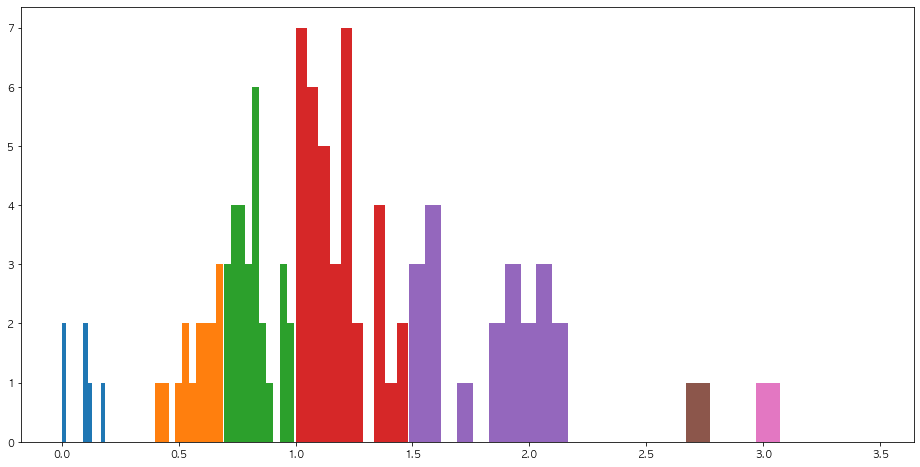

In [160]:
from sklearn.tree import DecisionTreeClassifier

test = pd.DataFrame(
    np.column_stack([m_60_1.columns,kmeans.datas.sum(axis=1), kmeans.labels_]),
    columns=['name','usage (kWh)', 'label']
)

plt.figure(figsize=(16, 8))

for label in np.unique(test['label']):
    plt.hist(test[test['label'] == label]['usage (kWh)'].values)
    
plt.show()

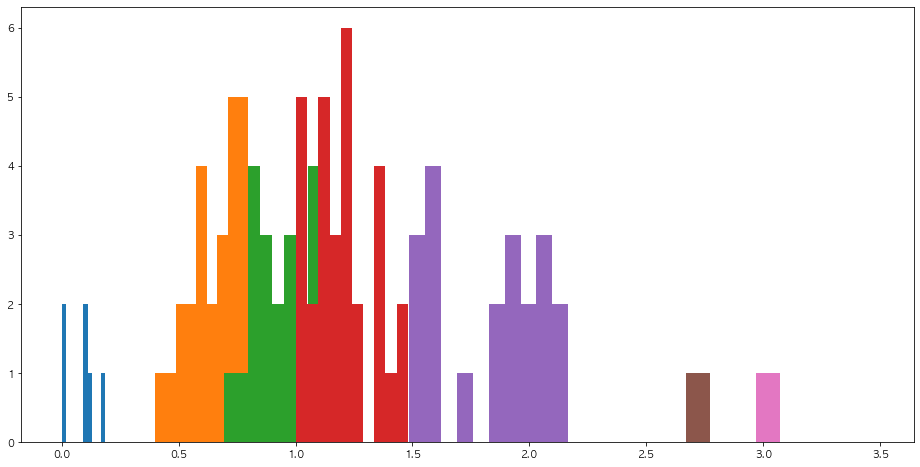

In [141]:
plt.figure(figsize=(16, 8))

for label in np.unique(test['label']):
    plt.hist(test[test['label'] == label]['usage (kWh)'].values)
    
plt.show()

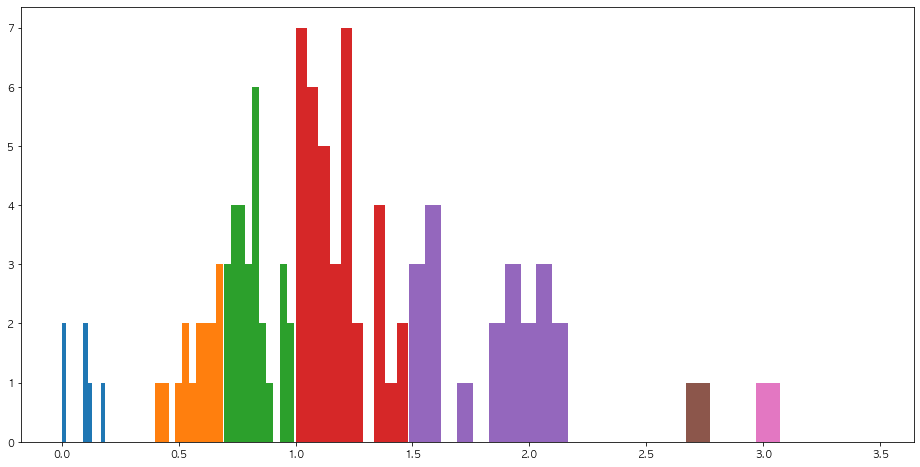

In [142]:
test['new label'] = adjust_anomaly(kmeans)
plt.figure(figsize=(16, 8))

for label in np.unique(test['new label']):
    plt.hist(test[test['new label'] == label]['usage (kWh)'].values)
    
plt.show()

In [24]:
kmeans.labels_

array([0., 0., 0., 0., 0., 1., 2., 2., 1., 1., 3., 3., 2., 3., 4., 4., 1.,
       3., 2., 1., 1., 1., 1., 4., 3., 1., 2., 4., 4., 1., 3., 3., 1., 3.,
       4., 3., 3., 1., 3., 3., 2., 2., 1., 1., 4., 3., 4., 1., 1., 1., 4.,
       1., 3., 3., 4., 2., 2., 2., 2., 2., 4., 1., 4., 3., 1., 3., 1., 1.,
       1., 1., 1., 2., 2., 1., 0., 1., 2., 3., 3., 1., 4., 4., 3., 2., 4.,
       3., 4., 2., 3., 6., 4., 4., 3., 3., 5., 2., 4., 3., 3., 2., 3., 1.,
       3., 3., 3., 2., 2., 4.])

In [ ]:
wm_sf = SavingFeedback(xlsx, _type="tdkmeans")
wm_sf.select_month(1)
wm_sf.kmeans_run()

In [161]:
from src import TimeDivisionKMeans

tdKMeans = TimeDivisionKMeans(datas=m_60_1)
tdKMeans.fit()

tdKMeans.cluster_info.head()[
    tdKMeans.cluster_info.columns[:10]
]

group_df = pd.DataFrame(np.column_stack([m_60_1.columns,
    m_60_1.sum(axis=0).round().astype("int")]), columns=["name", "usage (kWh)"])

group_df['label'] = tdKMeans.cluster_info.mean().round().astype("int").values

uni_labels = np.unique(group_df['label'].values)
m_anomaly = pd.DataFrame()

for idx, _label in enumerate(uni_labels[:-1]):
    _now = group_df[group_df['label'] == _label]
    _next = group_df[group_df['label'] == (_label + 1)]
    _chk = (_now['usage (kWh)'] > _next['usage (kWh)'].min()).values

    _anomaly = _now[_chk]
    if len(_anomaly) != 0:
        m_anomaly = m_anomaly.append(_anomaly, ignore_index=True)
        
group_df['label'] = tdKMeans.labels_

uni_labels = np.unique(group_df['label'].values)
wm_anomaly = pd.DataFrame()

for idx, _label in enumerate(uni_labels[:-1]):
    _now = group_df[group_df['label'] == _label]
    _next = group_df[group_df['label'] == (_label + 1)]
    _chk = (_now['usage (kWh)'] > _next['usage (kWh)'].min()).values

    _anomaly = _now[_chk]
    if len(_anomaly) != 0:
        wm_anomaly = m_anomaly.append(_anomaly, ignore_index=True)

1/248 - ECV:83%
11/248 - ECV:68%
21/248 - ECV:81%
31/248 - ECV:84%
41/248 - ECV:85%
51/248 - ECV:77%
61/248 - ECV:84%
71/248 - ECV:85%
81/248 - ECV:88%
91/248 - ECV:77%
101/248 - ECV:82%
111/248 - ECV:77%
121/248 - ECV:87%
131/248 - ECV:63%
141/248 - ECV:75%
151/248 - ECV:82%
161/248 - ECV:86%
171/248 - ECV:70%
181/248 - ECV:78%
191/248 - ECV:77%
201/248 - ECV:88%
211/248 - ECV:73%
221/248 - ECV:77%
231/248 - ECV:75%
241/248 - ECV:87%
248/248 - ECV:85%


In [162]:
m_anomaly

,name,usage (kWh),label
0,아파트1-103-1402,218,1
1,아파트1-103-106,351,2
2,아파트1-103-503,327,2
3,아파트1-101-704,473,3


In [163]:
sum_datas = tdKMeans.datas.sum(axis=2).sum(axis=0)
sum_total = tdKMeans.datas.sum(axis=2).sum(axis=0).sum()

weights = sum_datas / sum_total

In [164]:
sum_datas[-2]

165.56900000000002

In [165]:
weights

array([0.00379019, 0.00326419, 0.00375199, 0.00504067, 0.00462839,
       0.00477289, 0.00582897, 0.0050152 , 0.00357267, 0.00333274,
       0.00418226, 0.00360048, 0.00360836, 0.00401066, 0.00546628,
       0.00502549, 0.00363331, 0.00337335, 0.00419207, 0.00385777,
       0.00343798, 0.00388047, 0.00504076, 0.00492421, 0.00354357,
       0.00322731, 0.0040542 , 0.00373395, 0.00361836, 0.00390083,
       0.00515902, 0.00486057, 0.00353582, 0.0031604 , 0.00379691,
       0.00429175, 0.00394947, 0.00422095, 0.00563467, 0.00472659,
       0.003628  , 0.00314162, 0.00398677, 0.00416767, 0.00408584,
       0.00453116, 0.00559319, 0.00505202, 0.00357289, 0.00319609,
       0.00421599, 0.0036071 , 0.00326387, 0.003826  , 0.00542204,
       0.00517738, 0.00373607, 0.0032367 , 0.00409809, 0.00358411,
       0.0036289 , 0.00408548, 0.00553014, 0.00532651, 0.00379118,
       0.00337431, 0.00437268, 0.00366842, 0.00334338, 0.00401137,
       0.00516365, 0.00484263, 0.00363074, 0.0032057 , 0.00410

In [190]:
test = tdKMeans.cluster_info.sample(n=1, axis=1)

In [206]:
(test.values.flatten() * weights).sum() / weights.sum()

1.6461273680260395

In [207]:
test

,아파트1-101-1202
division_round,
0,1
1,1
2,1
3,3
4,2
...,...
243,2
244,2
245,2


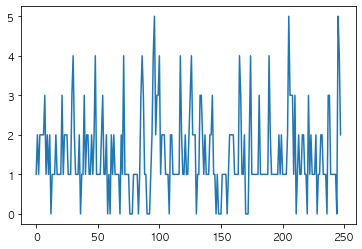

In [158]:
plt.figure(figsize=(16,8))

plt.plot(tdKMeans.cluster_info['아파트1-102-401'].values)

In [144]:
group_df[group_df['label'] == 2]

,name,usage (kWh),label
10,아파트1-103-502,236,2
14,아파트1-103-202,319,2
16,아파트1-102-603,251,2
17,아파트1-102-203,326,2
18,아파트1-102-704,255,2
19,아파트1-102-703,257,2
22,아파트1-101-604,228,2
24,아파트1-101-1002,253,2
25,아파트1-101-1202,239,2
27,아파트1-101-402,345,2


In [142]:
group_df['label'] = tdKMeans.cluster_info.mean().round().astype("int").values

In [210]:
from src import KMeans

ecv_check = KMeans(datas=m_60_1.T.values)
ecv_check.init_setting()

ecv_check.labels_ = tdKMeans.labels_
ecv_check.next_setting()

ecv_check.ecv

0.40779992613039395

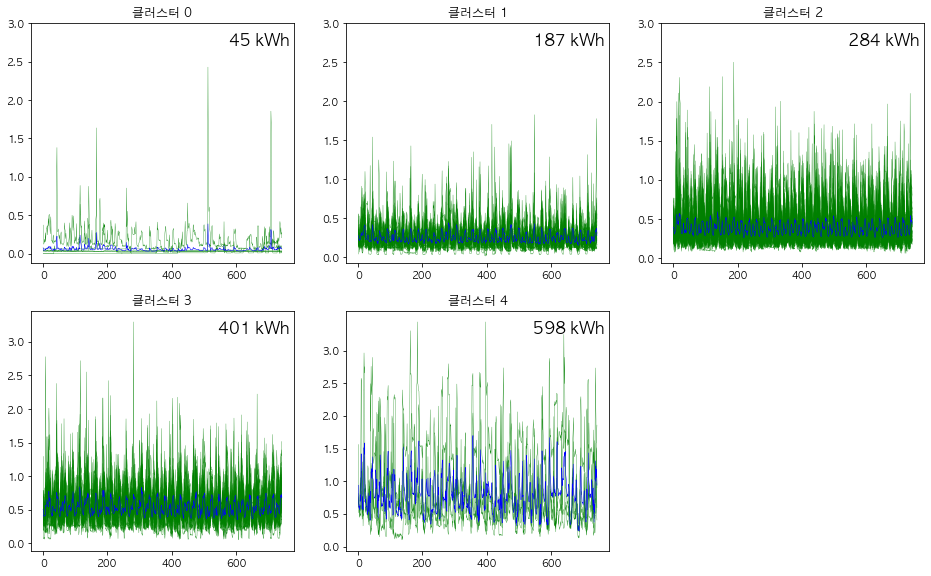

In [211]:
ecv_check.draw_plot()

In [140]:
test = group_df.sample(n=3)

test

,name,usage (kWh),label
60,아파트1-103-1706,381,3
104,아파트1-103-1106,255,2
93,아파트1-101-1401,343,2


In [139]:
tdKMeans.cluster_info[
    tdKMeans.cluster_info.columns[np.isin(tdKMeans.cluster_info.columns, test['name'])]
]

,아파트1-103-402,아파트1-103-703,아파트1-104-204
division_round,,,
0,2,4,2
1,3,6,3
2,1,5,1
3,1,5,1
4,2,3,1
...,...,...,...
243,1,5,1
244,1,6,1
245,2,3,2


In [127]:
wm_anomaly

""


In [67]:
tdKMeans.labels_ == tdKMeans.groups_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 3, 1, 3, 2, 4, 2, 2, 2, 2, 3, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 4, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 4, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 4, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2])

In [33]:
test = tdKMeans.cluster_info.copy()

array([0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 2, 3, 1, 3, 2, 4, 2, 2, 2, 2, 3, 1,
       2, 3, 2, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3,
       2, 2, 3, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 1, 2, 2, 3, 2, 4, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 4, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 2, 3, 2, 4, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2])

,name,usage (kWh),label
0,아파트1-101-402,345,2
1,아파트1-103-106,351,2


In [37]:
test.mean(axis=0).round().astype("int")

아파트1-104-1206    0
아파트1-104-303     0
아파트1-104-1307    0
아파트1-104-1208    0
아파트1-104-408     0
                ..
아파트1-103-903     2
아파트1-103-1106    2
아파트1-103-705     2
아파트1-103-1505    3
아파트1-103-406     2
Length: 108, dtype: int64

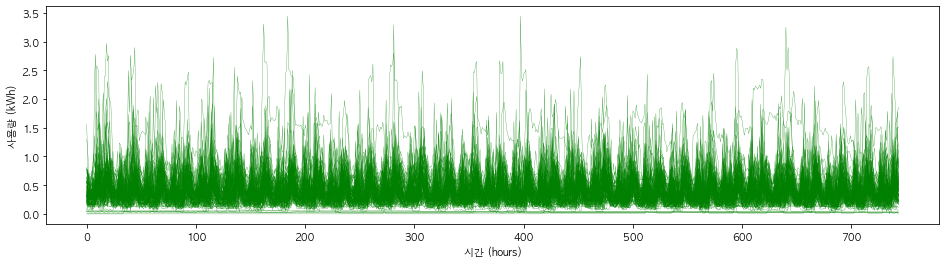

In [7]:
plt.figure(figsize=(16,4))

plt.plot(m_60_1.to_numpy(), color='g', linewidth=0.25)
plt.xlabel("시간 (hours)")
plt.ylabel("사용량 (kWh)")

plt.show()

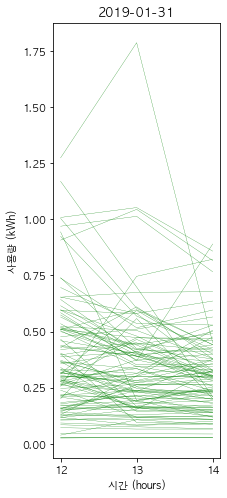

In [18]:
tdKMeans.draw_division_plot(division_round=244)

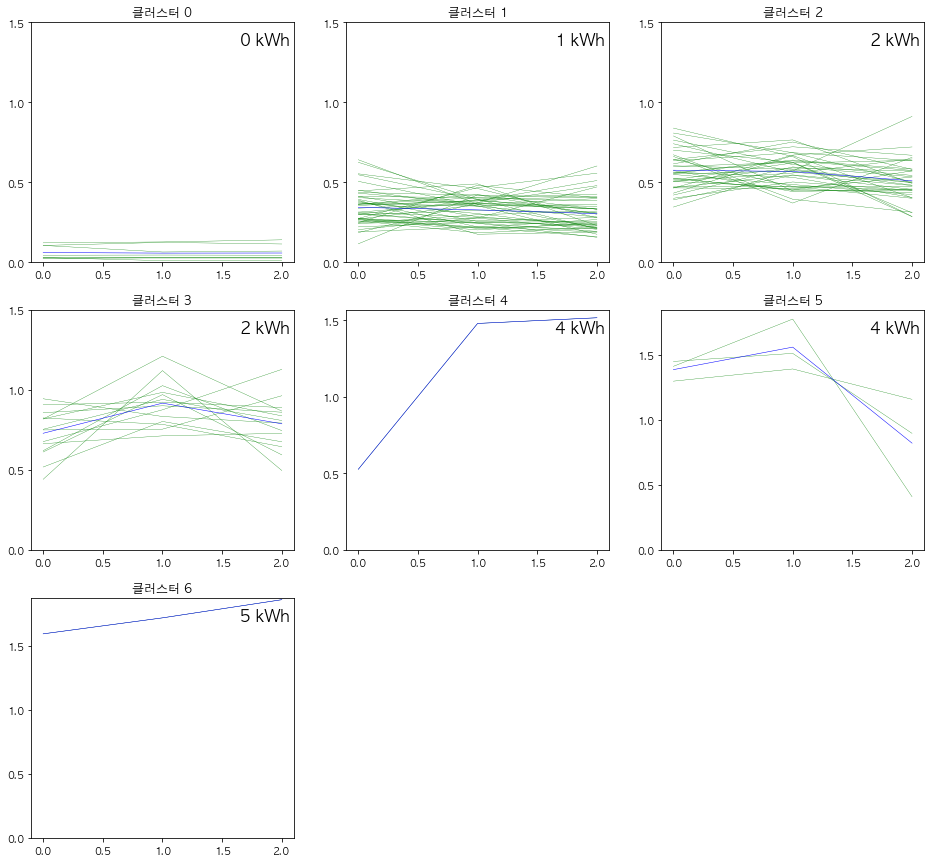

In [25]:
tdKMeans.kmeans_[247].draw_plot()